### Read the results data

In [1]:
path_to_csv = "results_faultlocalization/default/results.csv"

In [2]:
import pandas as pd

data = pd.read_csv(path_to_csv, index_col=["pid", "bid"])
data

target   env  checkout  compile  check_classfiles  \
pid     bid                                                      
Chart   3       NaN  True      True     True              True   
        5       NaN  True      True     True              True   
        24      NaN  True      True     True              True   
        22      NaN  True      True     True              True   
        19      NaN  True      True     True              True   
...             ...   ...       ...      ...               ...   
Closure 96      NaN  True      True     True              True   
        152     NaN  True      True     True              True   
        120     NaN  True      True     True              True   
        147     NaN  True      True     True              True   
        69      NaN  True      True     True              True   

             gzoltar_exec_time  gzoltar_executed_tests  gzoltar_failing_tests  \
pid     bid                                                                     
Chart   3               16.898                   False                  False   
        5               19.708                   False                  False   
        24              20.087                   False                  False   
        22                 NaN                   False                  False   
        19                 NaN                   False                  False   
...                        ...                     ...                    ...   
Closure 96                 NaN                   False                  False   
        152                NaN                   False                  False   
        120                NaN                   False                  False   
        147                NaN                   False                  False   
        69                 NaN                   False                  False   

             gzoltar_fl  flacoco_exec_time  flacoco_executed_tests  \
pid     bid                                                          
Chart   3         False            245.058                   False   
        5         False            184.994                   False   
        24        False            128.123                   False   
        22        False            127.224                   False   
        19        False            134.529                   False   
...                 ...                ...                     ...   
Closure 96        False                NaN                   False   
        152       False                NaN                   False   
        120       False            847.403                   False   
        147       False                NaN                   False   
        69        False           1157.673                   False   

             flacoco_failing_tests  flacoco_fl  
pid     bid                                     
Chart   3                     True        True  
        5                     True        True  
        24                    True        True  
        22                    True        True  
        19                    True        True  
...                            ...         ...  
Closure 96                   False       False  
        152                  False       False  
        120                   True        True  
        147                  False       False  
        69                    True        True  

[835 rows x 13 columns]

### Base setup
Defects4J v2.0 has 835 bugs

In [3]:
print("The results file contains %d bugs." % len(data))
print("The env was correctly setup for %d bugs." % len(data[data["env"]==True]))
env_data = data[data["env"]==True]
print("Out of those, the checkout was performed correctly for %d bugs." % len(env_data[env_data["checkout"]==True]))
checkout_data = env_data[env_data["checkout"]==True]

The results file contains 835 bugs.
The env was correctly setup for 835 bugs.
Out of those, the checkout was performed correctly for 835 bugs.


### Compilation and class files

In [4]:
print("%d bugs were compiled correctly." % len(checkout_data[checkout_data["compile"]==True]))
compile_data = checkout_data[checkout_data["compile"]==True]
print("Of those, %d bugs had the correct classfile versions in the target directories." % len(compile_data[compile_data["check_classfiles"]==True]))
classfile_data = compile_data[compile_data["check_classfiles"]==True]

# Save compilable bugs in csv file
pd.DataFrame(index=classfile_data.index).to_csv("results_faultlocalization/default_bugs.csv")

835 bugs were compiled correctly.
Of those, 835 bugs had the correct classfile versions in the target directories.


### Test execution

We only consider the bugs which where correctly setup

In [5]:
gzoltar_executed = len(classfile_data[classfile_data["gzoltar_executed_tests"]==True])
gzoltar_failing = len(classfile_data[classfile_data["gzoltar_failing_tests"]==True])
gzoltar_fl = len(classfile_data[classfile_data["gzoltar_fl"]==True])
gzoltar = (gzoltar_executed, gzoltar_failing, gzoltar_fl)

flacoco_executed = len(classfile_data[classfile_data["flacoco_executed_tests"]==True])
flacoco_failing = len(classfile_data[classfile_data["flacoco_failing_tests"]==True])
flacoco_fl = len(classfile_data[classfile_data["flacoco_fl"]==True])
flacoco = (flacoco_executed, flacoco_failing, flacoco_fl)

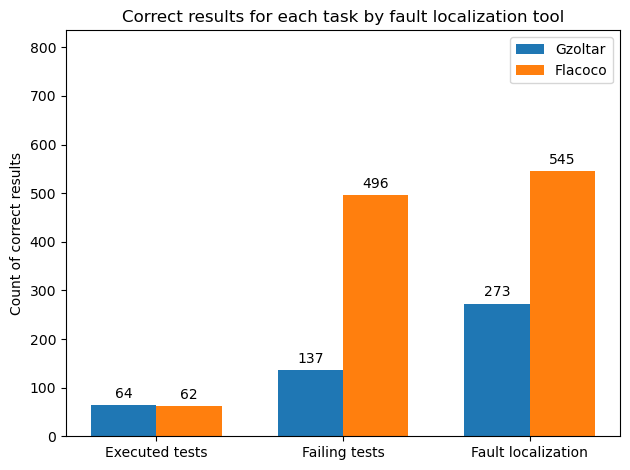

In [6]:
import matplotlib.pyplot as plt
import numpy as np

ind = np.arange(len(gzoltar))
width=0.35

fig, ax = plt.subplots()
ax.set_ylim([0, len(checkout_data)])
gzoltar_bar = ax.bar(ind - width/2, gzoltar, width, label="Gzoltar")
flacoco_bar = ax.bar(ind + width/2, flacoco, width, label="Flacoco")

ax.set_ylabel("Count of correct results")
ax.set_title("Correct results for each task by fault localization tool")
ax.set_xticks(ind)
ax.set_xticklabels(("Executed tests", "Failing tests", "Fault localization"))
ax.legend()

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')
        
autolabel(gzoltar_bar, "center")
autolabel(flacoco_bar, "center")

fig.tight_layout()
plt.show()

### Analyse the failures

In [7]:
compile_heatmap_df = pd.DataFrame(checkout_data.loc[:,"compile"].sort_index().astype(int)).unstack()
classfiles_heatmap_df = pd.DataFrame(compile_data.loc[:,"check_classfiles"].sort_index().astype(int)).unstack()
gzoltar_heatmap_df = pd.DataFrame(classfile_data.loc[:,"gzoltar_fl"].sort_index().astype(int)).unstack()
flacoco_heatmap_df = pd.DataFrame(classfile_data.loc[:,"flacoco_fl"].sort_index().astype(int)).unstack()

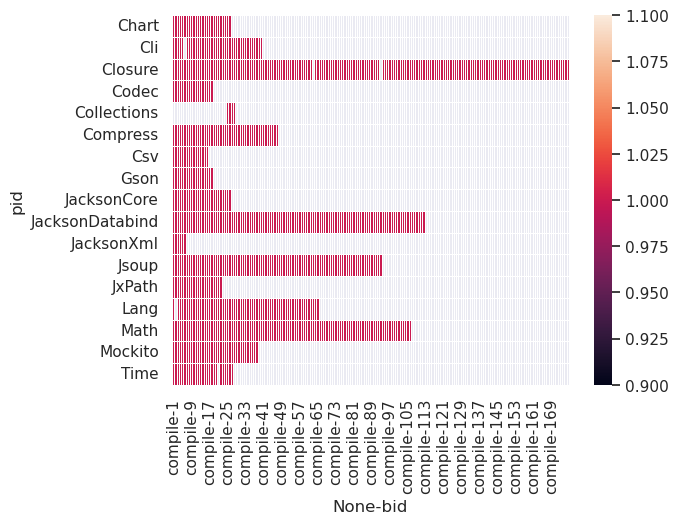

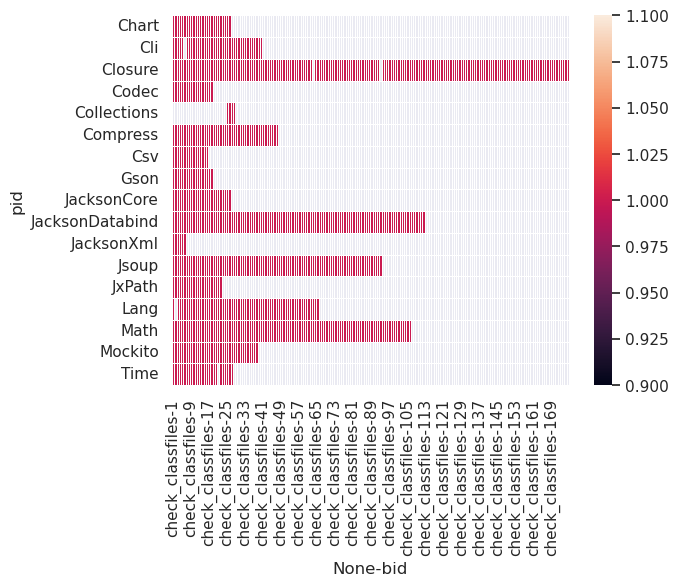

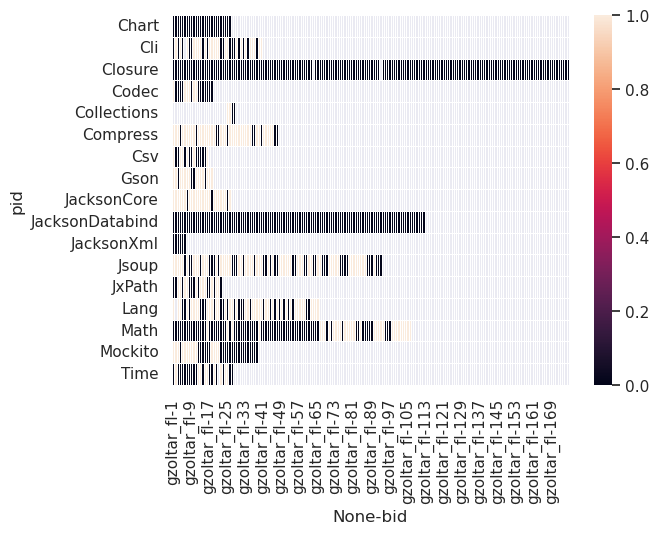

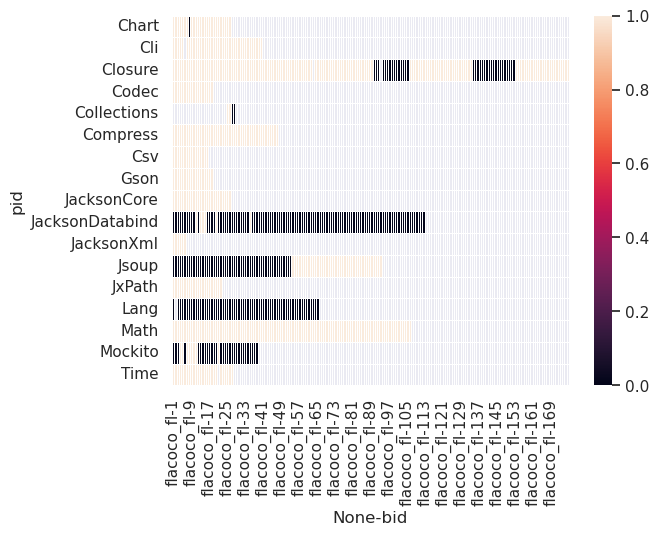

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

sns.heatmap(compile_heatmap_df, linewidths=.5)
plt.show()

sns.heatmap(classfiles_heatmap_df, linewidths=.5)
plt.show()

sns.heatmap(gzoltar_heatmap_df, linewidths=.5)
plt.show()

sns.heatmap(flacoco_heatmap_df, linewidths=.5)
plt.show()